### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [2]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

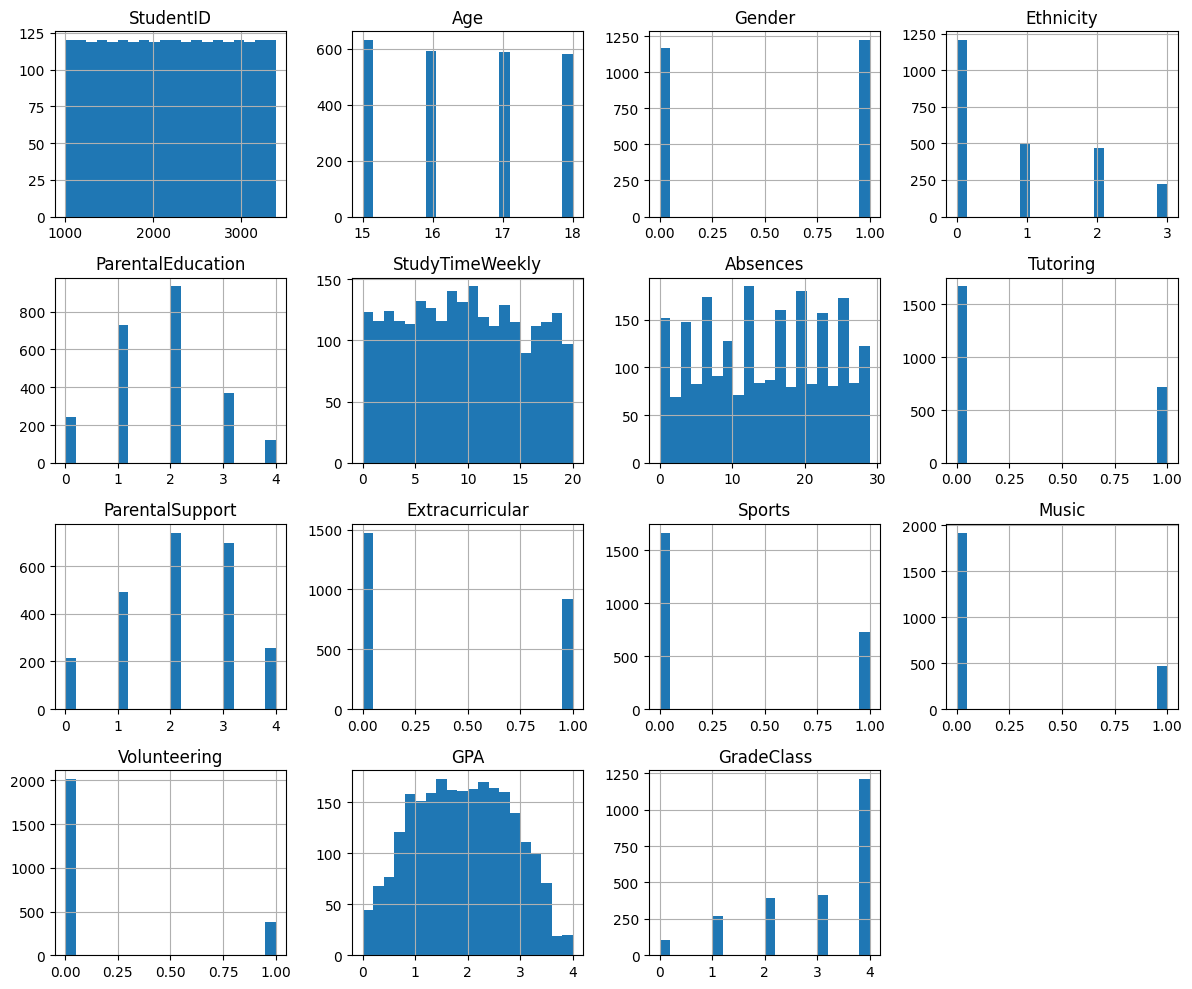

In [5]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


In [7]:
dataset = data.drop(columns=['StudentID', 'GradeClass','Gender', 'Ethnicity','ParentalSupport'])

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [8]:
null_values = dataset.isnull().sum()
null_values


Age                  0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop(columns=['GPA'])
y = dataset['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [15]:
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error'])


### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [16]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=10, 
                    validation_split=0.2)



Epoch 1/50
153/153 [==============================] - 2s 5ms/step - loss: 0.6801 - mean_absolute_error: 0.5735 - val_loss: 0.1318 - val_mean_absolute_error: 0.2875
Epoch 2/50
153/153 [==============================] - 0s 3ms/step - loss: 0.1130 - mean_absolute_error: 0.2675 - val_loss: 0.1024 - val_mean_absolute_error: 0.2571
Epoch 3/50
153/153 [==============================] - 0s 3ms/step - loss: 0.0928 - mean_absolute_error: 0.2443 - val_loss: 0.0917 - val_mean_absolute_error: 0.2409
Epoch 4/50
153/153 [==============================] - 1s 4ms/step - loss: 0.0815 - mean_absolute_error: 0.2270 - val_loss: 0.0800 - val_mean_absolute_error: 0.2268
Epoch 5/50
153/153 [==============================] - 0s 3ms/step - loss: 0.0764 - mean_absolute_error: 0.2191 - val_loss: 0.0801 - val_mean_absolute_error: 0.2286
Epoch 6/50
153/153 [==============================] - 0s 3ms/step - loss: 0.0734 - mean_absolute_error: 0.2162 - val_loss: 0.0755 - val_mean_absolute_error: 0.2179
Epoch 7/50
153/1

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

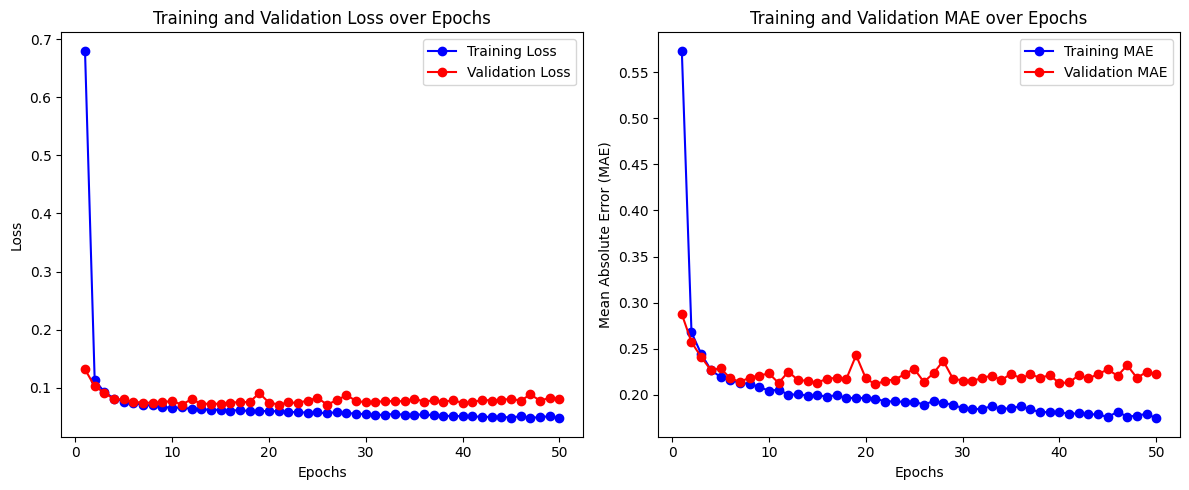

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()


Vemos que la grafica tiene un eje x de 50 epochs.

En el grafico de Training and Validation Loss vemos que la pérdida (Loss) en el conjunto de entrenamiento y en el de validación disminuye rápidamente al principio y luego logra estabilizarse. Esto nos indica que el modelo está aprendiendo de los datos y ajustándose bien sin signos evidentes de sobreajuste.

Y en el grafico de Training and Validation MAE El error absoluto medio (MAE) para el entrenamiento y la validación vemos que  también disminuye al principio y luego logra mantenerse estable. Esto nos sugiere que el modelo está mejorando la precisión de sus predicciones a lo largo del tiempo.

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [18]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')


15/15 [==============================] - 0s 3ms/step - loss: 0.0941 - mean_absolute_error: 0.2440
Test Loss: 0.09408453106880188
Test MAE: 0.2439603954553604


El Test Loss (0.0940) indica un error cuadrático promedio bajo, y el Test MAE (0.2440) muestra que el modelo predice el GPA con un error promedio de 0.244 unidades. En general son buenos resultados inicandonos que  el modelo tiene un buen desempeño en el conjunto de prueba.

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [19]:
predictions = model.predict(X_test_scaled)

for i in range(10): 
    print(f'Predicción: {predictions[i][0]:.4f}, Valor real: {y_test.iloc[i]:.4f}')


15/15 [==============================] - 0s 2ms/step
Predicción: 1.5649, Valor real: 1.4277
Predicción: 3.5433, Valor real: 3.1174
Predicción: 1.4109, Valor real: 2.0378
Predicción: 3.1594, Valor real: 3.5485
Predicción: 0.4686, Valor real: 0.2490
Predicción: 2.3125, Valor real: 2.6277
Predicción: 1.4235, Valor real: 2.0574
Predicción: 2.5370, Valor real: 2.2483
Predicción: 2.1418, Valor real: 2.1947
Predicción: 0.9693, Valor real: 0.7582


### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential()
model2.add(Dense(128, input_dim=9, activation='relu'))  
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))  
model2.add(Dense(1))  

model2.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

history2 = model2.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
153/153 [==============================] - 2s 6ms/step - loss: 0.3929 - mean_absolute_error: 0.4221 - val_loss: 0.0996 - val_mean_absolute_error: 0.2500
Epoch 2/100
153/153 [==============================] - 0s 3ms/step - loss: 0.0966 - mean_absolute_error: 0.2499 - val_loss: 0.0873 - val_mean_absolute_error: 0.2296
Epoch 3/100
153/153 [==============================] - 0s 3ms/step - loss: 0.0834 - mean_absolute_error: 0.2313 - val_loss: 0.0837 - val_mean_absolute_error: 0.2277
Epoch 4/100
153/153 [==============================] - 0s 3ms/step - loss: 0.0794 - mean_absolute_error: 0.2262 - val_loss: 0.0817 - val_mean_absolute_error: 0.2270
Epoch 5/100
153/153 [==============================] - 1s 4ms/step - loss: 0.0756 - mean_absolute_error: 0.2191 - val_loss: 0.0789 - val_mean_absolute_error: 0.2213
Epoch 6/100
153/153 [==============================] - 0s 3ms/step - loss: 0.0751 - mean_absolute_error: 0.2200 - val_loss: 0.0740 - val_mean_absolute_error: 0.2154
Epoch 7/10

In [21]:
test_loss2, test_mae2 = model2.evaluate(X_test_scaled, y_test)

print(f'Test Loss (Modelo 2): {test_loss2}')
print(f'Test MAE (Modelo 2): {test_mae2}')


15/15 [==============================] - 0s 3ms/step - loss: 0.1299 - mean_absolute_error: 0.2893
Test Loss (Modelo 2): 0.12985067069530487
Test MAE (Modelo 2): 0.289327472448349


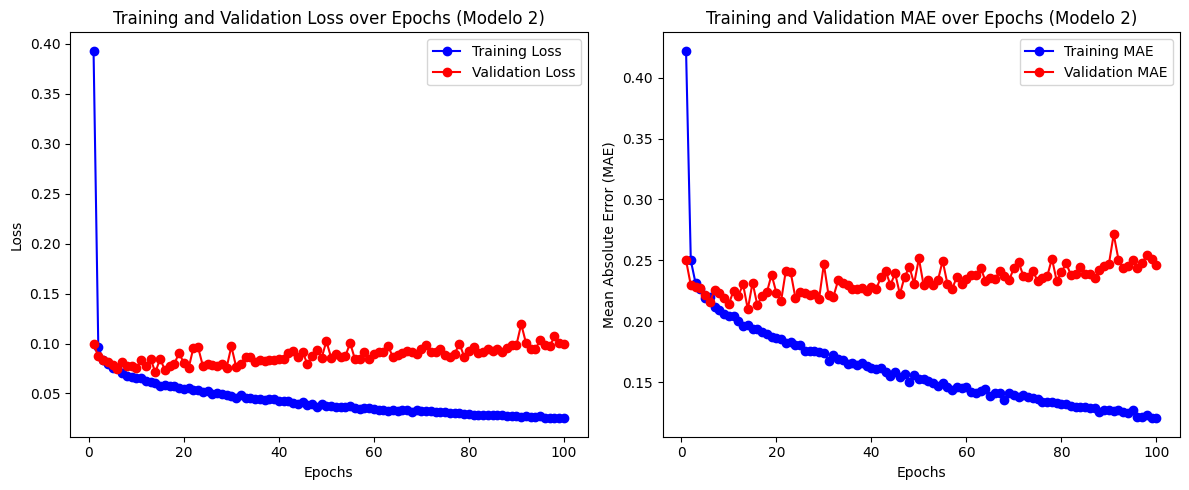

In [22]:
import matplotlib.pyplot as plt

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
mae2 = history2.history['mean_absolute_error']
val_mae2 = history2.history['val_mean_absolute_error']
epochs = range(1, len(loss2) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss2, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss2, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs (Modelo 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae2, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae2, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE over Epochs (Modelo 2)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
predictions2 = model2.predict(X_test_scaled)

for i in range(10):
    print(f'Predicción (Modelo 2): {predictions2[i][0]:.4f}, Valor real: {y_test.iloc[i]:.4f}')


15/15 [==============================] - 0s 2ms/step
Predicción (Modelo 2): 1.4364, Valor real: 1.4277
Predicción (Modelo 2): 3.6019, Valor real: 3.1174
Predicción (Modelo 2): 1.3493, Valor real: 2.0378
Predicción (Modelo 2): 3.0006, Valor real: 3.5485
Predicción (Modelo 2): 0.5131, Valor real: 0.2490
Predicción (Modelo 2): 2.1555, Valor real: 2.6277
Predicción (Modelo 2): 1.4516, Valor real: 2.0574
Predicción (Modelo 2): 2.2459, Valor real: 2.2483
Predicción (Modelo 2): 2.3696, Valor real: 2.1947
Predicción (Modelo 2): 0.9294, Valor real: 0.7582


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [27]:
import numpy as np

parental_education_index = X.columns.get_loc('ParentalEducation')

X_train_scaled_reduced = np.delete(X_train_scaled, parental_education_index, axis=1)
X_test_scaled_reduced = np.delete(X_test_scaled, parental_education_index, axis=1)

print(X_train_scaled_reduced.shape, X_test_scaled_reduced.shape)


(1913, 8) (479, 8)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model3 = Sequential()
model3.add(Dense(64, input_dim=8, activation='relu'))
model3.add(Dense(32, activation='relu'))  
model3.add(Dense(1))  


In [32]:
model3.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [33]:
history3 = model3.fit(X_train_scaled_reduced, y_train, epochs=30, batch_size=20, validation_split=0.2)


Epoch 1/30
77/77 [==============================] - 1s 8ms/step - loss: 3.2803 - mean_absolute_error: 1.5471 - val_loss: 2.8605 - val_mean_absolute_error: 1.4381
Epoch 2/30
77/77 [==============================] - 0s 3ms/step - loss: 2.2601 - mean_absolute_error: 1.2481 - val_loss: 2.1496 - val_mean_absolute_error: 1.2335
Epoch 3/30
77/77 [==============================] - 0s 4ms/step - loss: 1.7417 - mean_absolute_error: 1.0824 - val_loss: 1.7072 - val_mean_absolute_error: 1.0914
Epoch 4/30
77/77 [==============================] - 0s 3ms/step - loss: 1.4049 - mean_absolute_error: 0.9715 - val_loss: 1.4027 - val_mean_absolute_error: 0.9850
Epoch 5/30
77/77 [==============================] - 0s 4ms/step - loss: 1.1687 - mean_absolute_error: 0.8872 - val_loss: 1.1820 - val_mean_absolute_error: 0.9030
Epoch 6/30
77/77 [==============================] - 0s 4ms/step - loss: 0.9957 - mean_absolute_error: 0.8213 - val_loss: 1.0149 - val_mean_absolute_error: 0.8358
Epoch 7/30
77/77 [==========

In [34]:
test_loss3, test_mae3 = model3.evaluate(X_test_scaled_reduced, y_test)

print(f'Test Loss (Modelo 3): {test_loss3}')
print(f'Test MAE (Modelo 3): {test_mae3}')


15/15 [==============================] - 0s 3ms/step - loss: 0.1864 - mean_absolute_error: 0.3485
Test Loss (Modelo 3): 0.1864222139120102
Test MAE (Modelo 3): 0.34847110509872437


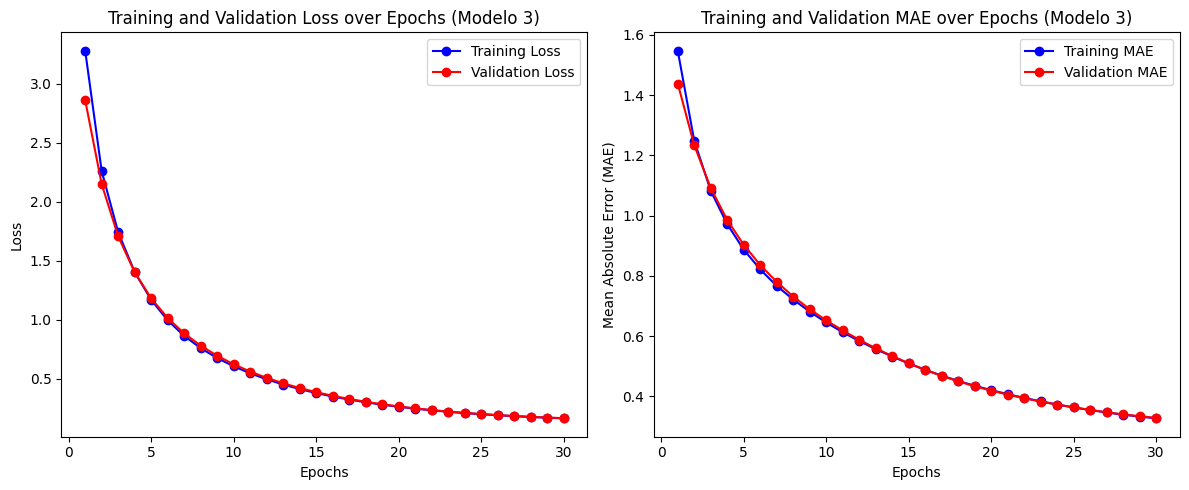

In [35]:
import matplotlib.pyplot as plt

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
mae3 = history3.history['mean_absolute_error']
val_mae3 = history3.history['val_mean_absolute_error']
epochs = range(1, len(loss3) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss3, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss3, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs (Modelo 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae3, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae3, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE over Epochs (Modelo 3)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
predictions3 = model3.predict(X_test_scaled_reduced)

for i in range(10):
    print(f'Predicción (Modelo 3): {predictions3[i][0]:.4f}, Valor real: {y_test.iloc[i]:.4f}')


15/15 [==============================] - 0s 2ms/step
Predicción (Modelo 3): 1.0348, Valor real: 1.4277
Predicción (Modelo 3): 3.0239, Valor real: 3.1174
Predicción (Modelo 3): 1.6269, Valor real: 2.0378
Predicción (Modelo 3): 3.2974, Valor real: 3.5485
Predicción (Modelo 3): 0.7243, Valor real: 0.2490
Predicción (Modelo 3): 2.4033, Valor real: 2.6277
Predicción (Modelo 3): 1.4794, Valor real: 2.0574
Predicción (Modelo 3): 2.2518, Valor real: 2.2483
Predicción (Modelo 3): 2.0764, Valor real: 2.1947
Predicción (Modelo 3): 1.1253, Valor real: 0.7582


In [40]:
test_loss1, test_mae1 = 0.094, 0.243 
test_loss2, test_mae2 = 0.129, 0.289  
test_loss3, test_mae3 = 0.186, 0.348 

results = pd.DataFrame({
    'Model': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
    'Loss': [test_loss1, test_loss2, test_loss3],
    'MAE': [test_mae1, test_mae2, test_mae3]
})

print(results)

best_model = results.loc[results['MAE'].idxmin(), 'Model']
best_model_message = f"El mejor modelo es {best_model} basado en el valor más bajo de MAE."

print(best_model_message)


      Model   Loss    MAE
0  Modelo 1  0.094  0.243
1  Modelo 2  0.129  0.289
2  Modelo 3  0.186  0.348
El mejor modelo es Modelo 1 basado en el valor más bajo de MAE.


In [41]:
predictions1 = [1.56, 3.54, 1.41, 3.15, 0.46]  
predictions2 = [1.43, 3.60, 1.34, 3.00, 0.51] 
predictions3 = [1.03, 3.02, 1.62, 3.29, 0.72] 
y_test_real = [1.42, 3.11, 2.03, 3.54, 0.24]  

comparison_df = pd.DataFrame({
    'Estudiante': [1, 2, 3, 4, 5],
    'Predicción Modelo 1': predictions1[:5],
    'Predicción Modelo 2': predictions2[:5],
    'Predicción Modelo 3': predictions3[:5],
    'Valor Real': y_test_real[:5]
})

print(comparison_df)



   Estudiante  Predicción Modelo 1  Predicción Modelo 2  Predicción Modelo 3  \
0           1                 1.56                 1.43                 1.03   
1           2                 3.54                 3.60                 3.02   
2           3                 1.41                 1.34                 1.62   
3           4                 3.15                 3.00                 3.29   
4           5                 0.46                 0.51                 0.72   

   Valor Real  
0        1.42  
1        3.11  
2        2.03  
3        3.54  
4        0.24  


Los cambios implementados para el modelo 2 y el modelo 3 fueron: 

En el Modelo 2, se trató de aumentar la complejidad, se añadieron más capas y unidades, y se cambió el optimizador a RMSprop, con más epochs para lograr un entrenamiento más extenso.

Y para  el Modelo 3, se trato de simpleficar  el modelo eliminando una característica del conjunto de datos 'ParentalEducation', para reducir el número de unidades, y se utilizó el optimizador Adagrad, entrenándolo por menos epochs.

Si comparamos los resultados de loss y MAE de los tres modelos, podemos concluir que el Modelo 1 es el que presenta el mejor desempeño, ya que tiene el MAE más bajo (0.243). Esto significa que las predicciones del GPA son más cercanas a los valores reales en promedio. A pesar de ser un modelo más cimplejo y un poco más robusto el Modelo 2 y el enfoque más simplificado del Modelo 3, el Modelo 1 logró tener un equilibrio óptimo entre simplicidad y precisión, dandomos mejores resultados con mayor aproximación a los resultados reales en su predicción.